In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

In [4]:
model = models.vgg16(pretrained = True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:25<00:00, 21.7MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [25]:
def preprocess_image(image_path):
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(image_path).convert('RGB')
    image = preprocess(image).unsqueeze(0)  # Add batch dimension
    return image


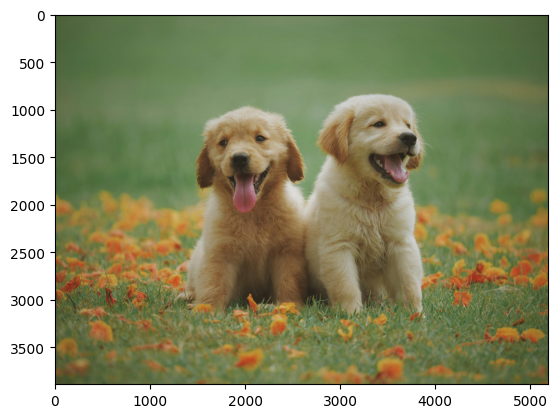

In [23]:
image = preprocess_image('/content/drive/My Drive/RBCDSAI/image.jpg')
img = Image.open('/content/drive/My Drive/RBCDSAI/image.jpg')
plt.imshow(img)
plt.show()

In [49]:
def get_feature_maps(model, layers, image):
  feature_maps = []
  handles = []
  def hook(module, input, output):
    feature_maps.append(output)

  for layer in layers:
    handle = layer.register_forward_hook(hook)
    handles.append(handle)

  with torch.no_grad():
    model(image)

    # Remove hooks
  for handle in handles:
     handle.remove()

  return feature_maps

def plot_feature_maps(feature_maps, layer_names, max_images=25):
    for fmap, layer_name in zip(feature_maps, layer_names):
        num_channels = fmap.shape[1]
        size = fmap.shape[2]

        # Determine the number of images to display
        num_images = min(num_channels, max_images)

        # Select a subset of the feature maps
        indices = np.random.choice(num_channels, num_images, replace=False)

        # Determine the grid size
        grid_size = int(np.ceil(np.sqrt(num_images)))

        fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
        fig.suptitle(f'Feature maps from layer: {layer_name}', fontsize=16)

        for i, ax in enumerate(axes.flat):
            if i < num_images:
                img = fmap[0, indices[i]].detach().numpy()
                ax.imshow(img, cmap='gray')
                ax.axis('off')
            else:
                ax.axis('off')  # Hide axes without images

        plt.tight_layout()
        plt.subplots_adjust(top=0.9)  # Adjust layout to accommodate suptitle
        plt.show()


In [27]:
layer_names = ['features.0', 'features.5', 'features.10', 'features.19', 'features.28']
layers = [dict(model.named_modules())[layer_name] for layer_name in layer_names]

In [50]:
feature_maps = get_feature_maps(model, layers, image)
plot_feature_maps(feature_maps,layer_names)

Output hidden; open in https://colab.research.google.com to view.